# Opgave eerste type B evaluatie over verkiezingsresultaten

In de loop van de type-B evaluaties gaan we proberen om de verkiezingsresultaten te voorspellen. In deze notebook gaan we vooral werken met een dataset van de resultaten maar we gaan er ook reeds wat andere gegevens bij betrekken.

Deze opgave bestaat uit de volgende stappen:
- Inlezen van twee beschikbare datasets
- Bestudeer de datasets apart door een aantal vragen te beantwoorden
- Vorm een samengesteld dataframe
- Voer exploratory data analysis uit


## Inlezen data

In deze opgave wordt er gewerkt met twee beschikbare datasets.
* De eerste dataset is reeds aanwezig in de excel file in deze repository. Deze bevat de verkiezingsresultaten van de Vlaamse gemeenten.
* De tweede dataset waarmee gewerkt wordt vind je op [statbel](https://statbel.fgov.be/en/open-data/population-place-residence-nationality-marital-status-age-and-sex-8)

Voer nu de volgende stappen uit om de data in te lezen:
* Laad de eerste dataset nu in door hem via pandas in te laden in een variabele df_results. Opgelet: bekijk eerst via excel of er rijen moeten overgeslaan worden en of er een headerrij aanwezig is.
* Download de zipfile op de link van de tweede dataset met de opendatasets package
* Unzip het bestand
* Laad de csv in het .txt bestand in met pandas in een dataframe met de naam df_population
* Print van elk dataframe de eerste 10 rijen uit om een idee te krijgen van de beschikbare data. 

In [2]:
import pandas as pd

df_results = pd.read_excel('resultaten_verkiezing_gemeenteraad_20181014_na_20190702.xlsx', skiprows=2, sheet_name='lijsten')
display(df_results.head())

df_population = pd.read_excel('TF_SOC_POP_STRUCT_2018.xlsx')
display(df_population.head())

,type,datum,NIS,kieskring,mandaten,ingeschreven\nkiezers,totaal\nstembiljetten,blanco&ongeldig,lijstnr,lijst,aantal\nkandidaten,lijststemmen cat.1,lijststemmen cat.2,stemcijfer,verkiesbaarheidscijfer,verkregen zetels,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,CG,14/10/2018,41002,Aalst,43,64065,58148,1797,1,sp.a,43,1006,3256,4262,3197.0,3,NaN,NaN,NaN
1,CG,14/10/2018,41002,Aalst,43,64065,58148,1797,2,N-VA,43,3557,15131,18688,17589.0,16,NaN,NaN,NaN
2,CG,14/10/2018,41002,Aalst,43,64065,58148,1797,3,CD&V,43,910,6642,7552,6474.0,6,NaN,NaN,NaN
3,CG,14/10/2018,41002,Aalst,43,64065,58148,1797,4,Groen,43,1618,3660,5278,4223.0,4,NaN,NaN,NaN
4,CG,14/10/2018,41002,Aalst,43,64065,58148,1797,5,VLAAMS BELANG,43,3553,6210,9763,8679.0,8,NaN,NaN,NaN


,CD_MUNTY_REFNIS,TX_MUNTY_DESCR_NL,TX_MUNTY_DESCR_FR,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,TX_ADM_DSTR_DESCR_FR,CD_PROV_REFNIS,TX_PROV_DESCR_NL,TX_PROV_DESCR_FR,CD_RGN_REFNIS,...,CD_SEX,CD_NATLTY,TX_NATLTY_FR,TX_NATLTY_NL,CD_CIV_STS,TX_CIV_STS_FR,TX_CIV_STS_NL,CD_AGE,MS_POPULATION,CD_YEAR
0,71024,Herk-de-Stad,Herck-la-Ville,71000,Arrondissement Hasselt,Arrondissement de Hasselt,70000.0,Provincie Limburg,Province de Limbourg,2000,...,F,BEL,Belges,Belgen,20,Marié,Gehuwd,39,42,2018
1,71037,Lummen,Lummen,71000,Arrondissement Hasselt,Arrondissement de Hasselt,70000.0,Provincie Limburg,Province de Limbourg,2000,...,M,BEL,Belges,Belgen,20,Marié,Gehuwd,82,24,2018
2,71011,Diepenbeek,Diepenbeek,71000,Arrondissement Hasselt,Arrondissement de Hasselt,70000.0,Provincie Limburg,Province de Limbourg,2000,...,F,BEL,Belges,Belgen,20,Marié,Gehuwd,42,51,2018
3,71016,Genk,Genk,71000,Arrondissement Hasselt,Arrondissement de Hasselt,70000.0,Provincie Limburg,Province de Limbourg,2000,...,M,BEL,Belges,Belgen,20,Marié,Gehuwd,63,277,2018
4,71017,Gingelom,Gingelom,71000,Arrondissement Hasselt,Arrondissement de Hasselt,70000.0,Provincie Limburg,Province de Limbourg,2000,...,F,BEL,Belges,Belgen,20,Marié,Gehuwd,30,14,2018


## Eerste inzichten

Voordat je begint met de dataframes te manipuleren en te bewerken om de gegevens samen te voegen, ga je eerst op zoek naar een antwoord op de volgende vragen.
Deze vragen dienen om je een beter inzicht te geven in de beschikbare data.

Schrijf hieronder per vraag de nodige code om de vraag te beantwoorden en vergeet ook niet steeds zeker de vraag tekstueel te beantwoorden.

* Vraag 1: Welke partijen hebben meegedaan aan de verkiezingen in minstens de helft van de gemeenten? Wat is het aantal gemiddelde partijen per gemeente? Welke 5 partijen hebben in de meeste gemeenten deelgenomen?

**Antwoord:**

In [13]:
# Vraag 1
aantal_gemeenten = df_results.NIS.nunique()
print(f'aantal gemeenten is {aantal_gemeenten}')

gemeenten_per_lijst = df_results.groupby('lijst').size()
print(f'subvraag 1: {len(gemeenten_per_lijst[gemeenten_per_lijst >= aantal_gemeenten/2.0])}')

print(f'subvraag 2: {df_results.groupby('NIS').size().mean()}') # de size geeft het aantal partijen per gemeente

print(f'subvraag 3: \n{gemeenten_per_lijst.sort_values(ascending=False).iloc[:5]}')

aantal gemeenten is 300
subvraag 1: 3
subvraag 2: 5.413333333333333
subvraag 3: 
lijst
N-VA             252
CD&V             212
VLAAMS BELANG    150
Open Vld         135
Groen            130
dtype: int64


* Vraag 2: Zijn er fouten aanwezig in de dataset van de verkiezingsresultaten? Dit wil zeggen: komt het aantal blanco stemmen + lijst-stemmen (zowel cat 1 als cat 2) overeen met het totaal aantal kiesbiljetten. Wat is de top 3 van de gemeentes met het grootste percentage mensen dat niet is komen opdagen (deze personen hebben niet gestemd en niet blanco gestemd)? Let op dat je dit per gemeente moet bekijken en dat de verkiezingsresultaten per partij per gemeente opgelijst zijn.

**Antwoord:**

In [16]:
# Vraag 2
tmp = df_results.groupby('NIS').agg({'totaal\nstembiljetten': 'first', 'blanco&ongeldig': 'first', 'stemcijfer':'sum'}) # maak de som van de stemcijfers en neem 1 keer blanco en totaal
print(f'aantal fouten {(tmp['totaal\nstembiljetten'] != tmp['blanco&ongeldig'] + tmp.stemcijfer).sum()}')

aantal fouten 0


* Vraag 3: Maak een histogram van het aantal kandidaten per lijst. Doe dit ook eens voor het aantal kandidaten van de lijst die gewonnen heeft in elke gemeente. Is er een significant verschil tussen deze twee histogrammen?

**Antwoord:**

<Axes: ylabel='Frequency'>

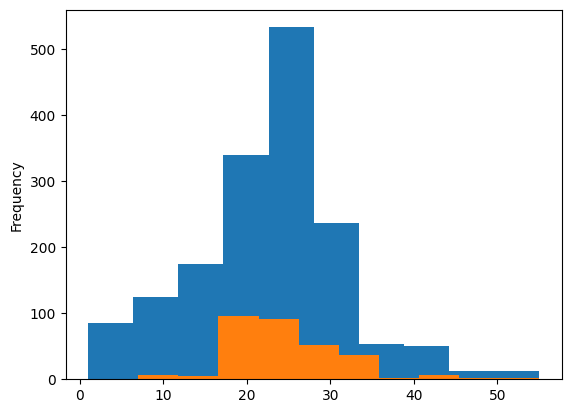

In [21]:
# Vraag 3
df_results['aantal\nkandidaten'].plot.hist()

# histogram van enkel de winnaars
df_results.sort_values(by='stemcijfer', ascending=False).groupby('NIS').first()['aantal\nkandidaten'].plot.hist()

# wat opvalt:
# het is normaal dat de hist van de winnaars (de orangje) dat die veel lager gaat zijn (omdat er minder winnende partijen zijn dan totaal partijen)
# de piek van beide histogrammen ligt ongeveer gelijk
# kleine partijen (minder dan 17 kandidaten ongeveer) een veel kleinere kans op winnen hebben

* Vraag 4: Bestudeer de MS_Population kolom van de df_population kolom. Wat stelt deze kolom voor? Bereken het totaal aantal inwoners dat minstens 18 jaar oud is in een gemeente met een Belgische nationaliteit en het totaal aantal met een niet-Belgische nationaliteit (ook minstens 18 jaar). Vergelijk deze aantallen met het aantal uitgegeven kiesbiljetten in 2018 (aantal stemgerechtigen). Wat kan je hieruit besluiten? Tip: Kiesbiljetten zijn per gemeente te bekijken en niet per partij en per gemeente. Kijk daarnaast eens welke gemeenten in elke dataset zitten.

**Antwoord:**

In [32]:
# Vraag 4
tmp = df_population[df_population.CD_AGE >= 18].groupby('CD_NATLTY').MS_POPULATION.sum()
print(tmp)

print('aantal inwonende personen', tmp.sum())

print('aantal stembiljetten', df_results.groupby('NIS')['totaal\nstembiljetten'].first().sum())

# dit komt niet overeen, df_results -> 300 gemeenten (dit is enkel voor in vlaanderen)
# df_population  bevat informatie over heel belgie

CD_NATLTY
BEL    7968835
ETR    1105740
Name: MS_POPULATION, dtype: int64
aantal inwonende personen 9074575
aantal stembiljetten 4514355


* Vraag 5: Maak een scatterplot van het aantal inwoners in elke gemeente en de gemiddelde leeftijd in de gemeente. Is er hier een verband uit af te leiden? Bespreek je antwoord.

<Axes: xlabel='MS_POPULATION', ylabel='avgPerGem'>

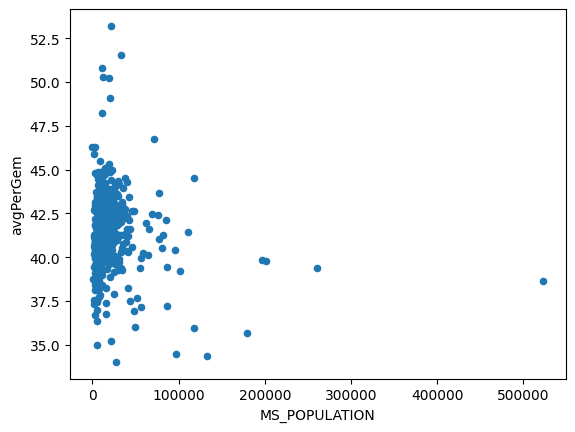

In [38]:
# Vraag 5
tmp = df_population.copy()

tmp['avgPerGem'] = tmp.CD_AGE * tmp.MS_POPULATION
tmp = tmp.groupby('CD_MUNTY_REFNIS').agg({'MS_POPULATION':'sum', 'avgPerGem': 'sum'})
tmp.avgPerGem = tmp.avgPerGem / tmp.MS_POPULATION

tmp.plot.scatter(x='MS_POPULATION', y='avgPerGem')

# Data merging

Momenteel zitten de verkiezingsresultaten in 1 dataframe en de input-data om ze te voorspellen in een ander dataframe. Om verder vlot te kunnen werken gaan we een gecombineerd dataframe bouwen.

Dit dataframe gaat er als volgt uitzien:
* Index: identifier-code van de gemeente
* Van de 5 partijen uit vraag 1, welke partij had het grootste percentage
* Het behaalde percentage van de stemmen in een gemeente van de vijf partijen die in het grootste aantal gemeentes hebben meegedaan (zie vraag 1 hierboven).
* De totale bevolking van een gemeente
* Het percentage gehuwde mannen met de belgische nationaliteit (ten opzichte van totale bevolking) in een gemeente
* Het percentage gehuwde vrouwen met de belgische nationaliteit (ten opzichte van totale bevolking) in een gemeente
* Het percentage gehuwde mannen met niet de belgische nationaliteit (ten opzichte van totale bevolking) in een gemeente
* Het percentage gehuwde vrouwen met niet de belgische nationaliteit (ten opzichte van totale bevolking) in een gemeente
* Het percentage alleenstaande mannen met de belgische nationaliteit (ten opzichte van totale bevolking) in een gemeente
* Het percentage alleenstaande vrouwen met de belgische nationaliteit (ten opzichte van totale bevolking) in een gemeente
* Het percentage alleenstaande mannen met niet de belgische nationaliteit (ten opzichte van totale bevolking) in een gemeente
* Het percentage alleenstaande vrouwen met niet de belgische nationaliteit (ten opzichte van totale bevolking) in een gemeente
* Gemiddelde leeftijd in een gemeente

In [62]:
# samenvoegen van de dataframes

vijf_lijsten = gemeenten_per_lijst.sort_values(ascending=False).head().index.to_list()
df_results['pct_stemmen'] = df_results.stemcijfer / (df_results['totaal\nstembiljetten'] - df_results['blanco&ongeldig'])

df = df_results.pivot_table(index='NIS', columns='lijst', values=('pct_stemmen'))
df['winnaar'] = df.idxmax(axis=1) # welke index is het grootste doet idxmax
df.winnaar = df.winnaar.where(df.winnaar.isin(vijf_lijsten), 'geen')

vijf_lijsten.append('winnaar')
df = df.loc[:, vijf_lijsten]

tot_bevolking = df_population.groupby('CD_MUNTY_REFNIS').MS_POPULATION.sum()
tot_bevolking.name = 'tot_bevolking' # stel de kolomnaam in
df = df.join(tot_bevolking, how='left')

tmp = df_population.groupby(['CD_MUNTY_REFNIS', 'CD_SEX' , 'CD_NATLTY' , 'CD_CIV_STS']).MS_POPULATION.sum()
tmp = tmp.reset_index(level=['CD_SEX' , 'CD_NATLTY' , 'CD_CIV_STS'])

for geslacht in ['F', 'M']:
    for nat in ['BEL', 'ETR']:
        # gehuwd == status 20
        gehuwd = tmp[(tmp.CD_SEX == geslacht) & (tmp.CD_NATLTY==nat) & (tmp.CD_CIV_STS == 20)]
        df[geslacht + '_' + nat + '_gehuwd'] = gehuwd.MS_POPULATION / tot_bevolking
        
        # ongehuwd != status 20
        ongehuwd = tmp[(tmp.CD_SEX == geslacht) & (tmp.CD_NATLTY==nat) & (tmp.CD_CIV_STS != 20)]
        ongehuwd = ongehuwd.groupby(ongehuwd.index).MS_POPULATION.sum()
        df[geslacht + '_' + nat + '_ongehuwd'] = ongehuwd / tot_bevolking


# gemiddelde leeftijd
tmp = df_population.copy()
tmp['avgPerGem'] = tmp.CD_AGE * tmp.MS_POPULATION
tmp = tmp.groupby('CD_MUNTY_REFNIS').agg({'MS_POPULATION':'sum', 'avgPerGem': 'sum'})
tmp.avgPerGem = tmp.avgPerGem / tmp.MS_POPULATION
df['mean_age'] = tmp.avgPerGem

display(df)

,N-VA,CD&V,VLAAMS BELANG,Open Vld,Groen,winnaar,tot_bevolking,F_BEL_gehuwd,F_BEL_ongehuwd,F_ETR_gehuwd,F_ETR_ongehuwd,M_BEL_gehuwd,M_BEL_ongehuwd,M_ETR_gehuwd,M_ETR_ongehuwd,mean_age
NIS,,,,,,,,,,,,,,,,
11001,0.457891,NaN,0.078571,0.184403,0.093370,N-VA,14304.0,0.213017,0.264262,0.011046,0.012794,0.211200,0.261395,0.011535,0.014751,45.066625
11002,0.352853,0.067807,0.104680,0.055829,0.180769,N-VA,523248.0,0.126668,0.275831,0.035389,0.062989,0.130617,0.259672,0.033927,0.074907,38.650430
11004,0.215965,0.099784,0.063754,NaN,NaN,geen,13120.0,0.193216,0.289939,0.010442,0.016235,0.193369,0.271570,0.008155,0.017073,42.960595
11005,0.297562,0.137697,0.134252,0.047253,0.081081,N-VA,17970.0,0.157373,0.292710,0.023038,0.033333,0.160657,0.280467,0.019588,0.032832,39.899610
11007,0.380124,NaN,0.138160,0.035388,NaN,geen,10685.0,0.170239,0.293870,0.019841,0.033224,0.169958,0.263828,0.017220,0.031820,41.341694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73066,0.210761,0.516238,0.065148,0.207853,NaN,CD&V,16665.0,0.180258,0.220162,0.038644,0.057786,0.179718,0.220942,0.040144,0.062346,43.104290
73083,0.137429,NaN,0.099935,NaN,0.084163,geen,31032.0,0.194444,0.281451,0.012664,0.018497,0.194090,0.265178,0.012825,0.020849,44.169696
73098,0.103097,0.177596,NaN,0.206740,NaN,geen,7402.0,0.221697,0.268576,0.004728,0.004323,0.222372,0.269387,0.003918,0.004999,43.587409


## Data Exploration

In het modelling gedeelte van deze opgave gaan we proberen om de verkiezingsresultaten te bepalen voor de verschillende partijen.
Voor je hieraan begint, analyseer de beschikbare data om te bestuderen of het model kan leiden tot een goed resultaat.
Bereken hiervoor per partij de correlatiematrix en de pairplot met alle features en het behaalde verkiezingsresultaat. 

Bespreek deze figuren aan de hand van de volgende vragen:
* Welke feature gaat het best gebruikt kunnen worden om het resultaat te voorspellen?
* Zijn er features waar het mogelijk is om een linear/niet-linear verband te detecteren ten opzichte van het te voorspellen resultaat? Verklaar wat je ziet?
* Is er een verschil tussen deze waarden voor de verschillende partijen of zijn ze gelijkaardig. Wat zou hiervan de oorzaak zijn?

**Antwoord: ...**

In [64]:
# partij 1
df.drop('winnaar', axis=1).corr()

,N-VA,CD&V,VLAAMS BELANG,Open Vld,Groen,tot_bevolking,F_BEL_gehuwd,F_BEL_ongehuwd,F_ETR_gehuwd,F_ETR_ongehuwd,M_BEL_gehuwd,M_BEL_ongehuwd,M_ETR_gehuwd,M_ETR_ongehuwd,mean_age
N-VA,1.000000,-0.245299,0.190048,-0.462166,0.297099,0.083914,-0.078597,0.054009,0.048011,0.069309,-0.089920,-0.082155,0.051546,0.066321,-0.018326
CD&V,-0.245299,1.000000,-0.117804,-0.181377,-0.255230,-0.209730,0.336768,-0.299061,-0.082791,-0.108526,0.326873,-0.118469,-0.057706,-0.089936,0.126205
VLAAMS BELANG,0.190048,-0.117804,1.000000,-0.342811,-0.025227,0.028466,-0.074111,0.027983,0.004635,0.039584,-0.074249,0.078491,-0.004199,0.047018,-0.250605
Open Vld,-0.462166,-0.181377,-0.342811,1.000000,-0.198148,-0.143688,0.201494,-0.100480,-0.126305,-0.181521,0.203173,0.051194,-0.109032,-0.204334,0.093544
Groen,0.297099,-0.255230,-0.025227,-0.198148,1.000000,0.087862,-0.138297,0.190273,-0.012708,0.035673,-0.139094,0.093157,-0.019119,0.036845,-0.149650
tot_bevolking,0.083914,-0.209730,0.028466,-0.143688,0.087862,1.000000,-0.361101,0.091136,0.151334,0.237573,-0.339261,-0.012923,0.128272,0.288024,-0.165944
F_BEL_gehuwd,-0.078597,0.336768,-0.074111,0.201494,-0.138297,-0.361101,1.000000,0.055309,-0.783737,-0.836160,0.996855,0.372851,-0.747532,-0.816243,0.437165
F_BEL_ongehuwd,0.054009,-0.299061,0.027983,-0.100480,0.190273,0.091136,0.055309,1.000000,-0.631141,-0.581256,0.085591,0.730942,-0.656482,-0.598209,-0.058252
F_ETR_gehuwd,0.048011,-0.082791,0.004635,-0.126305,-0.012708,0.151334,-0.783737,-0.631141,1.000000,0.971135,-0.803570,-0.820706,0.994046,0.945580,-0.248346
F_ETR_ongehuwd,0.069309,-0.108526,0.039584,-0.181521,0.035673,0.237573,-0.836160,-0.581256,0.971135,1.000000,-0.851912,-0.779531,0.963993,0.984745,-0.259784


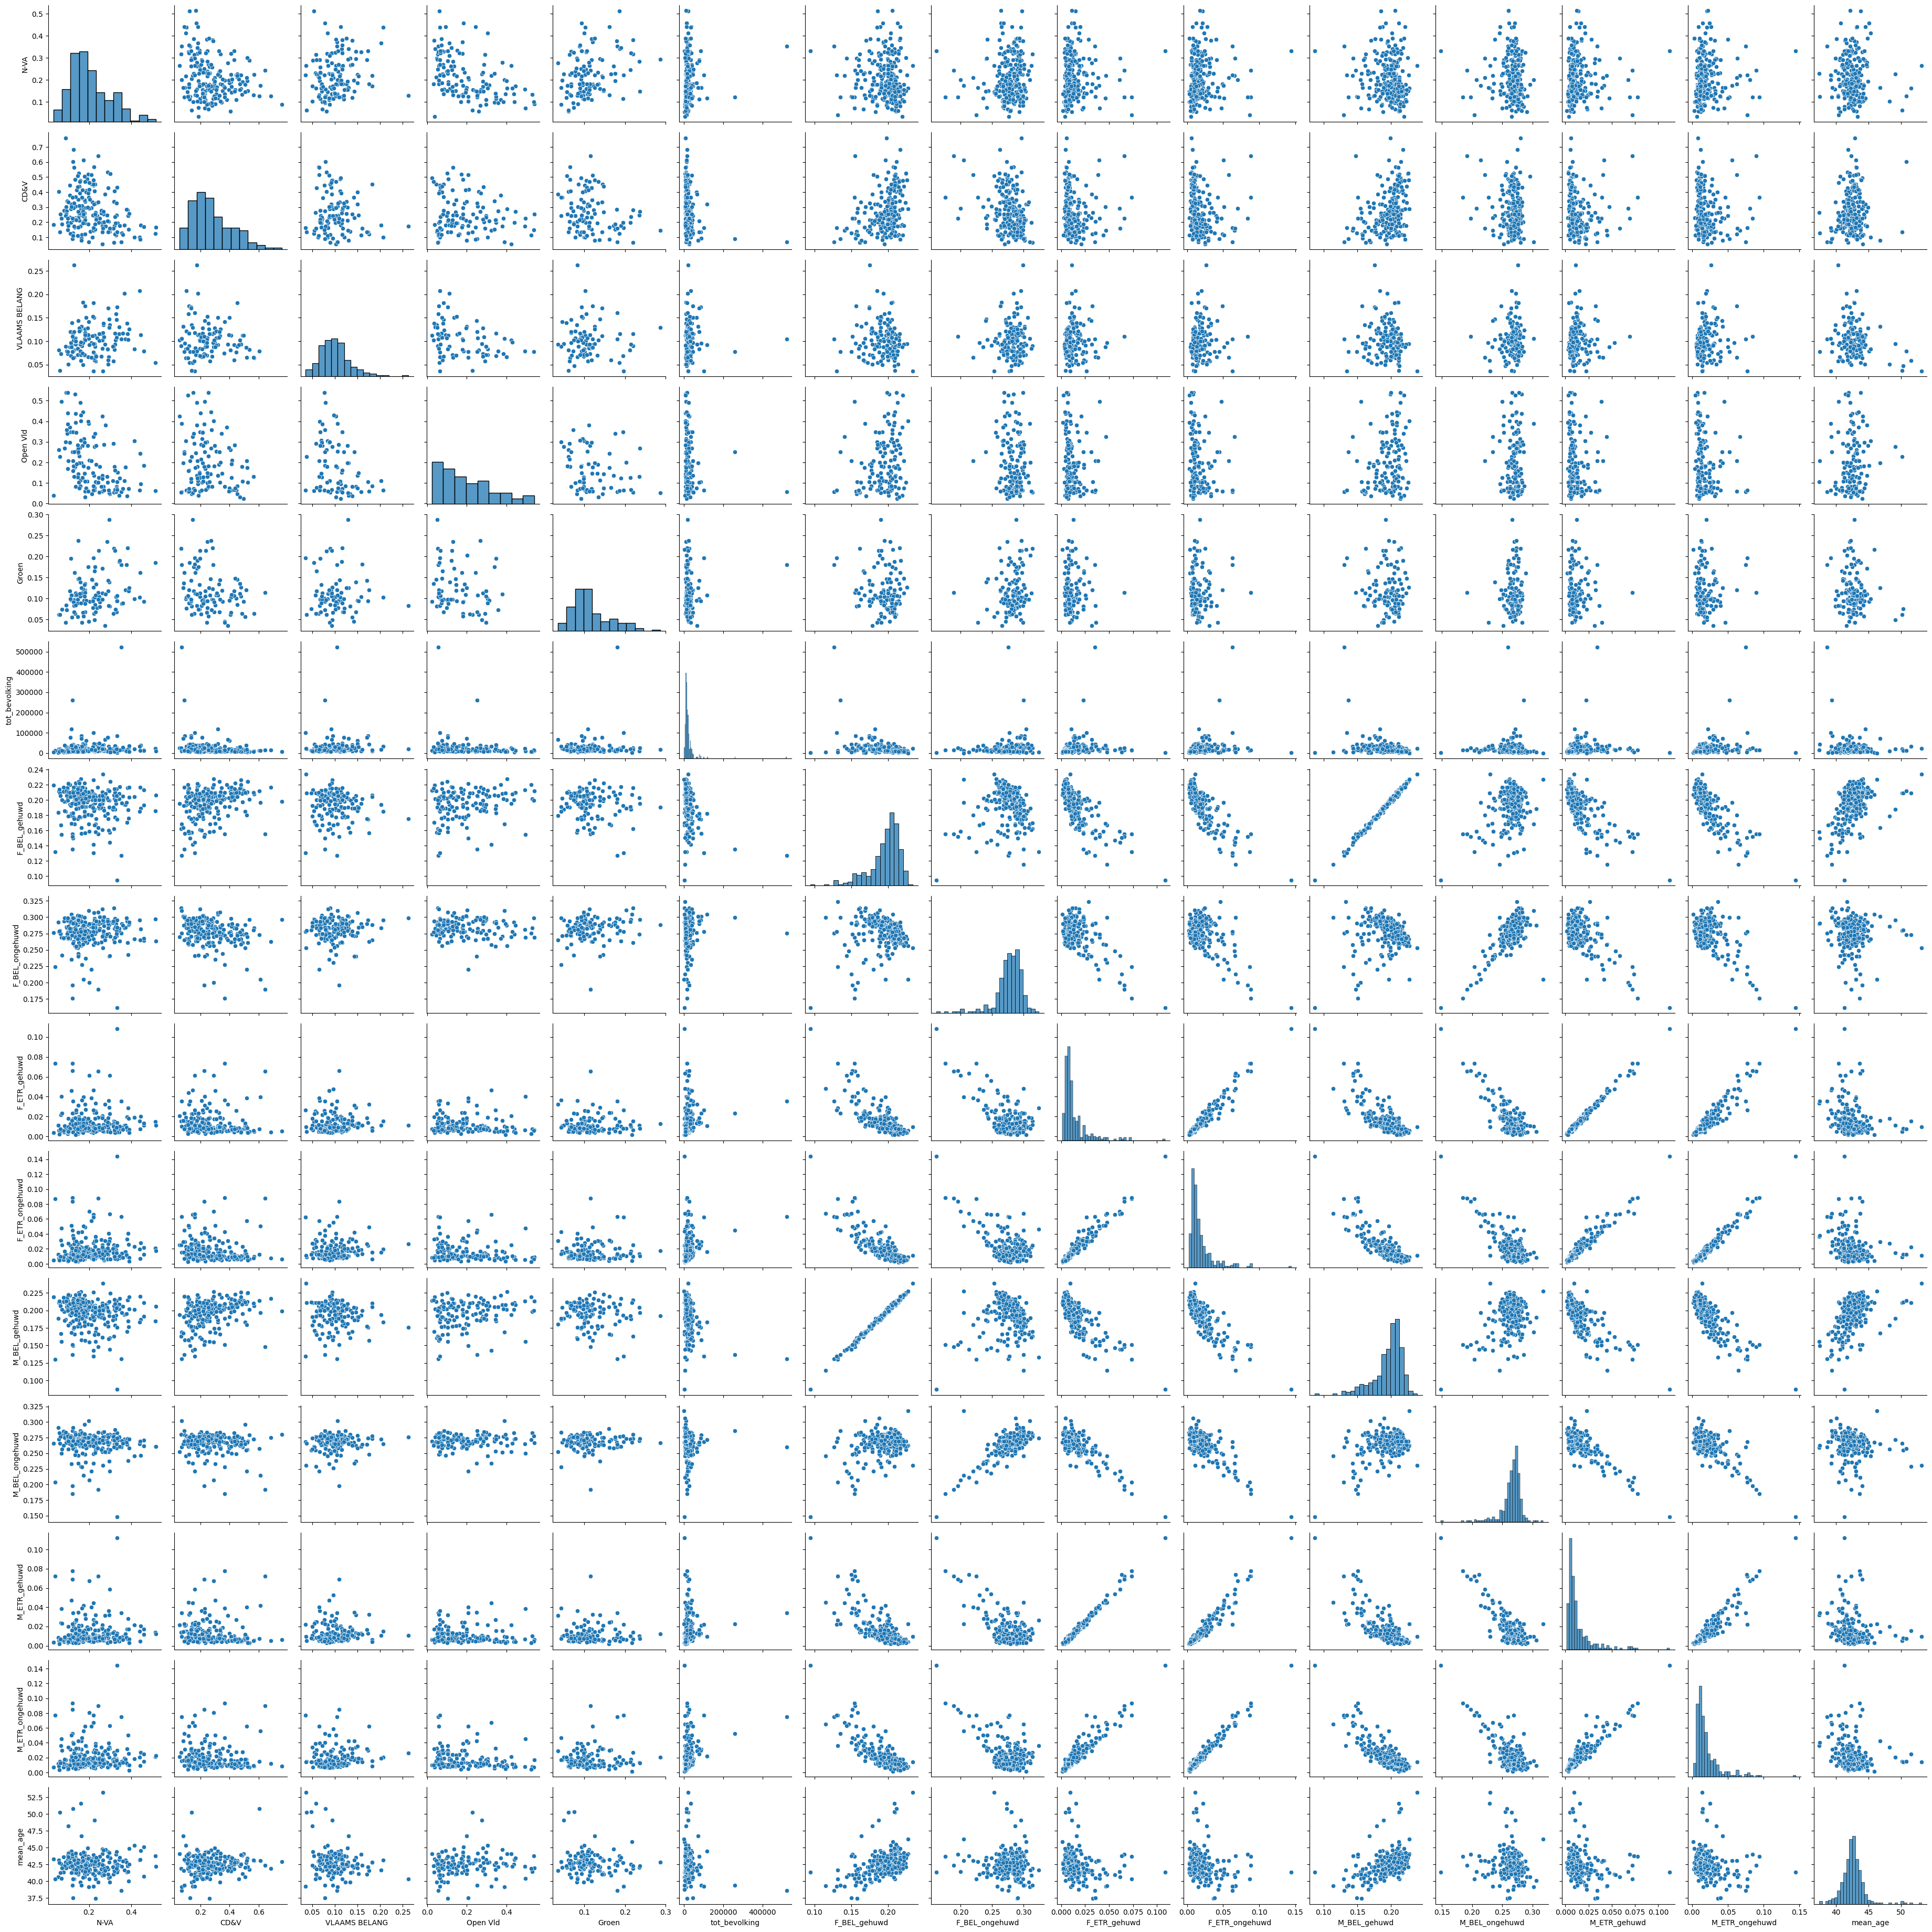

In [65]:
# partij 2
import seaborn as sns
sns.pairplot(df)

In [ ]:
# partij 3

In [ ]:
# partij 4

In [ ]:
# partij 5